In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa

In [33]:
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): 
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [34]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

1) Read in the data.

In [35]:
df=pd.read_csv('C:/Users/Dell/Downloads/example_time_series.csv')
df.head(5)

,Date,ts_1,ts_2,ts_3,ts_4,ts_5,ts_6
0,2020-01-05,0.422207,-0.334830,-0.194485,0.304119,0.335330,0.628650
1,2020-01-12,-0.455290,-0.343508,-0.649775,0.385431,0.253175,-0.062857
2,2020-01-19,0.914767,-0.080714,0.264993,0.987436,0.202251,0.474599
3,2020-01-26,0.562761,0.010582,0.827754,0.830760,0.137298,-0.591919
4,2020-02-02,-0.649239,-0.088101,0.178515,-0.827785,0.305798,-0.372528


2) Make the "Date" column a datetime index with a weekly frequency.

In [36]:
# Make Date a datetime object 
df['Date'] = pd.to_datetime(df['Date'])
# Make Date the index
df = df.set_index('Date')
# We have weekly data so we will set our frequency to W
df.index.freq= "W"

3) Split the dataframe into the separate time series:

In [37]:
ts_1 = df['ts_1']
ts_2 = df['ts_2']
ts_3 = df['ts_3']
ts_4 = df['ts_4']
ts_5 = df['ts_5']
ts_6 = df['ts_6']

4) For each time series

# ts1

* Plot the time series

<Axes: xlabel='Date'>

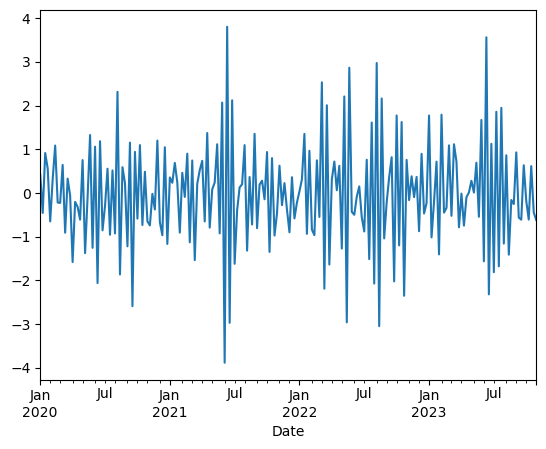

In [38]:
ts_1.plot()

* Check for stationarity

In [39]:
get_adfuller_results(ts_1)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-14.612186,1,198,0.0,0.05,True


* Determine if differencing is needed (d)

* View the ACF and PACF plots of the stationary data to infer potential model type and orders

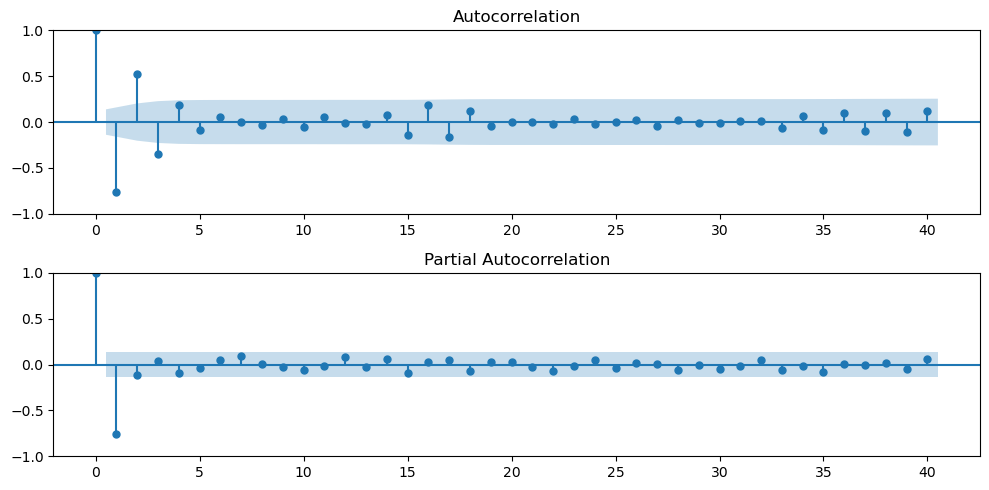

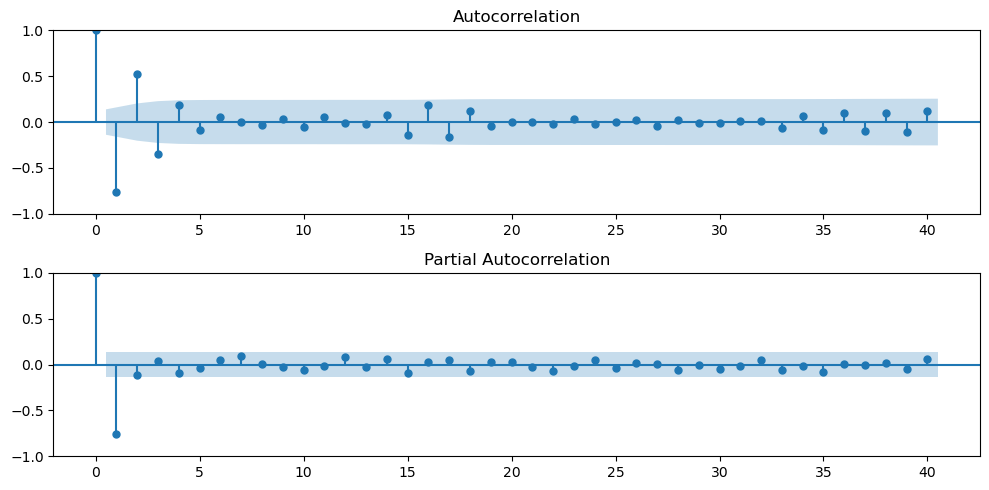

In [40]:
plot_acf_pacf(ts_1)

# ts_2

<Axes: xlabel='Date'>

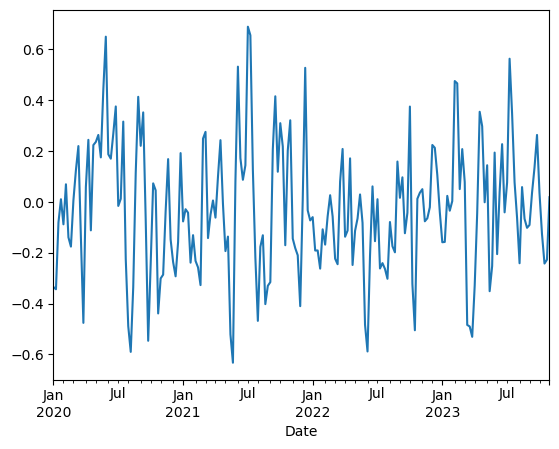

In [41]:
ts_2.plot()

In [42]:
get_adfuller_results(ts_2)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-6.139526,5,194,0.0,0.05,True


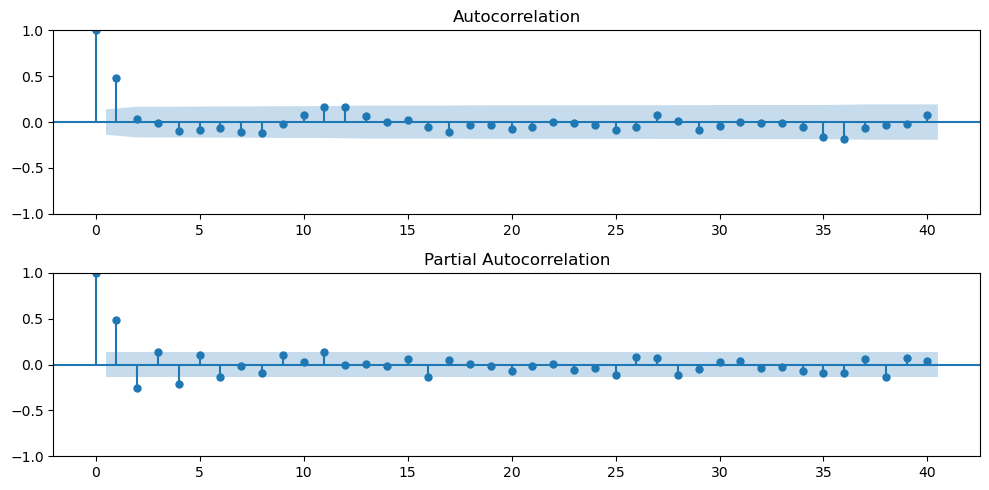

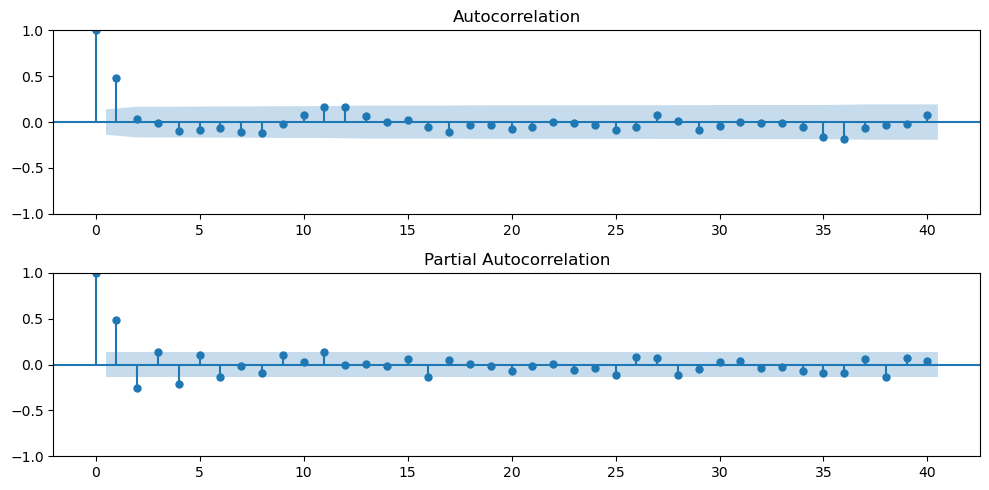

In [43]:
plot_acf_pacf(ts_2)

# ts_3

<Axes: xlabel='Date'>

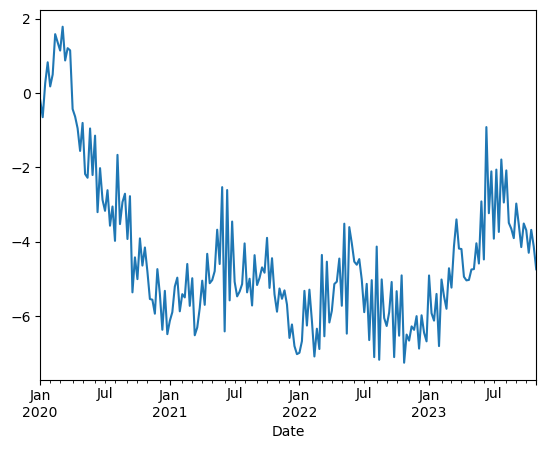

In [44]:
ts_3.plot()

In [45]:
get_adfuller_results(ts_3)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.366153,2,197,0.151518,0.05,False


In [46]:
diff_3 = ts_3.diff().dropna()

In [47]:
get_adfuller_results(diff_3)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-14.597695,1,197,0.0,0.05,True


<Axes: xlabel='Date'>

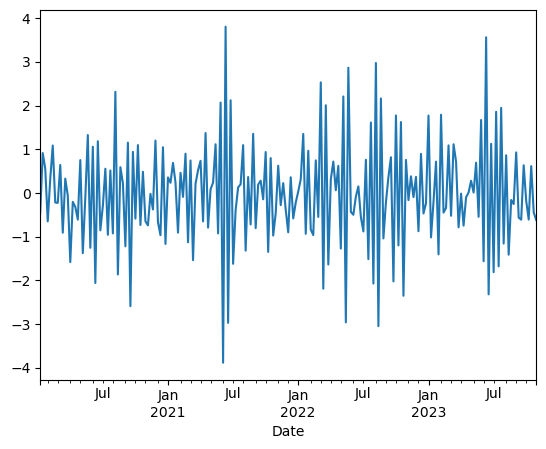

In [48]:
diff_3.plot()

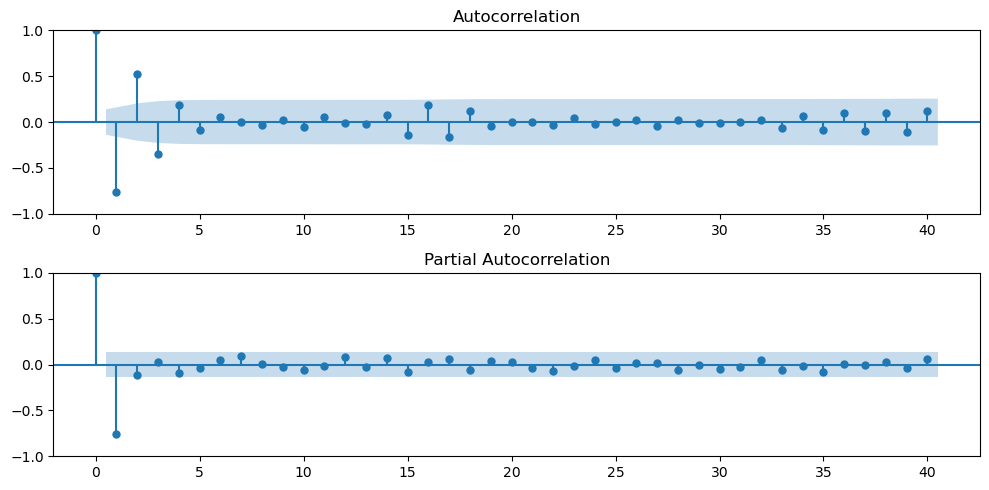

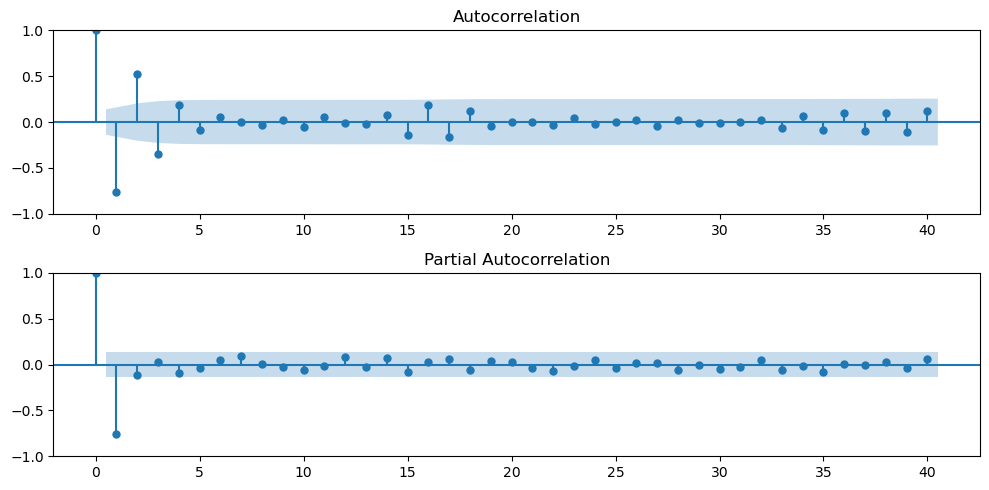

In [49]:
plot_acf_pacf(diff_3)

# ts_4

<Axes: xlabel='Date'>

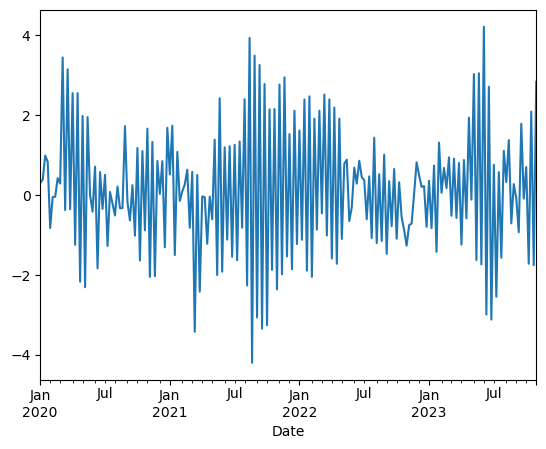

In [50]:
ts_4.plot()

In [51]:
get_adfuller_results(ts_4)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-6.825134,1,198,0.0,0.05,True


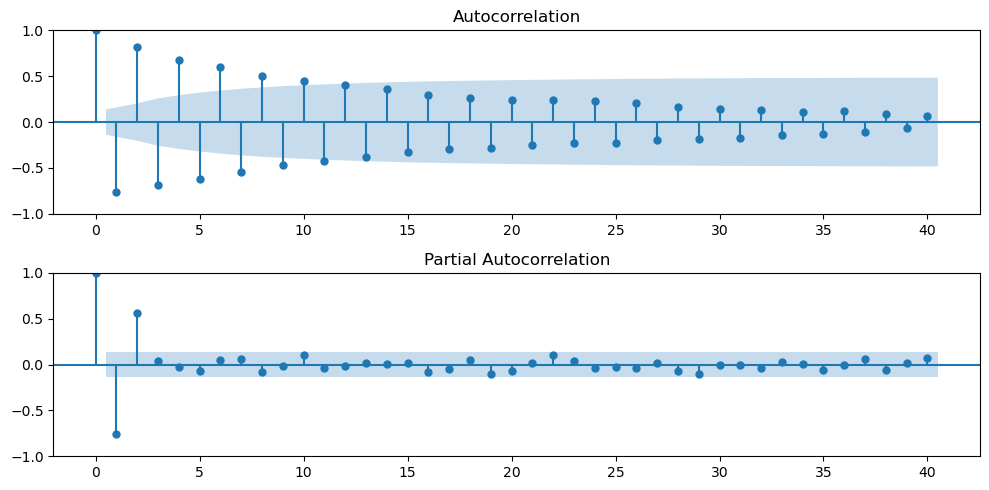

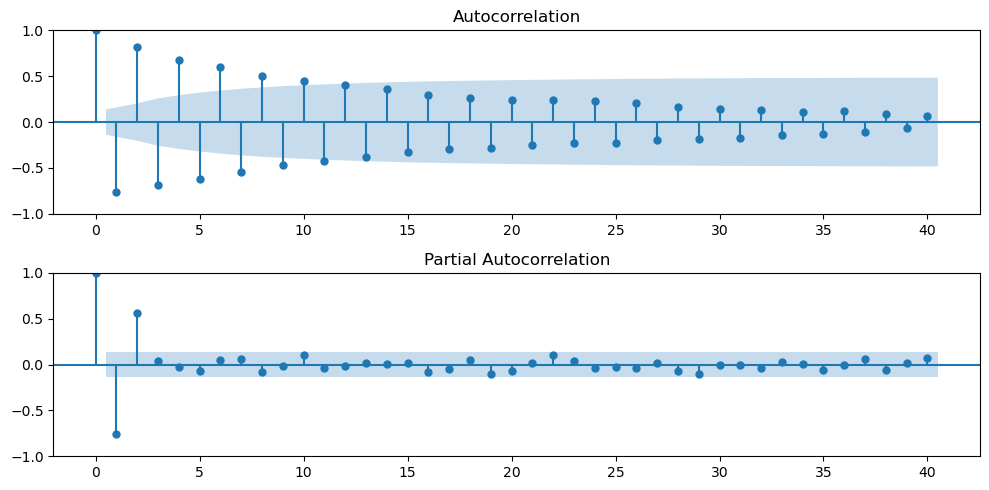

In [52]:
plot_acf_pacf(ts_4)

# ts_5

<Axes: xlabel='Date'>

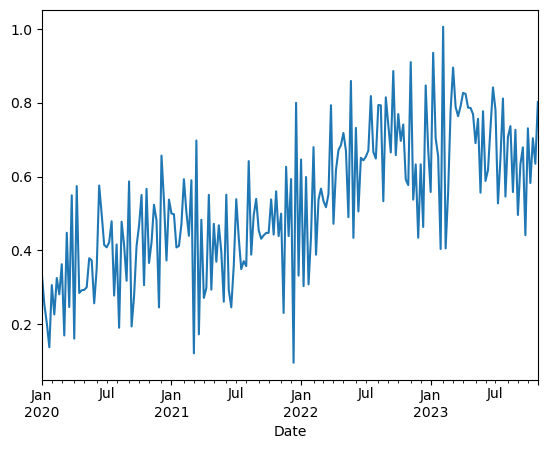

In [53]:
ts_5.plot()

In [54]:
get_adfuller_results(ts_5)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.085917,4,195,0.250215,0.05,False


In [55]:
diff_5 = ts_5.diff().dropna()
get_adfuller_results(diff_5)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-12.465469,3,195,0.0,0.05,True


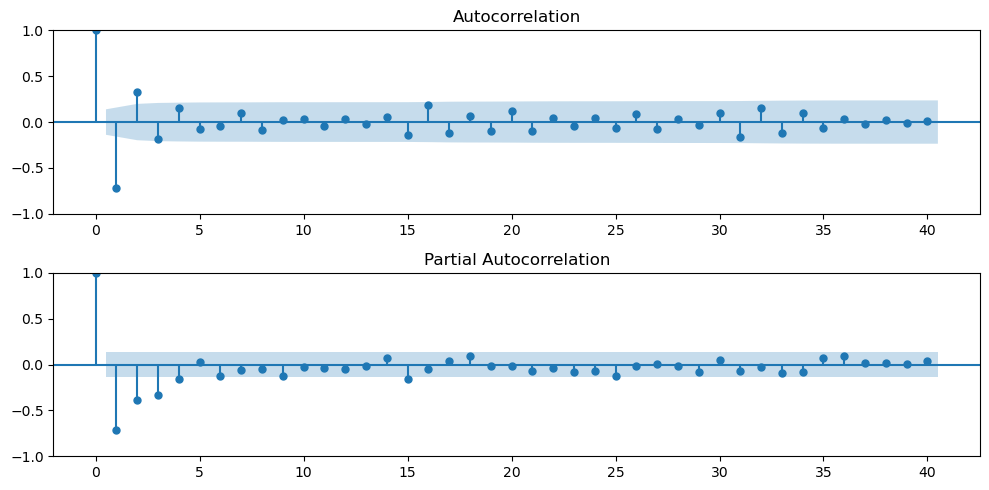

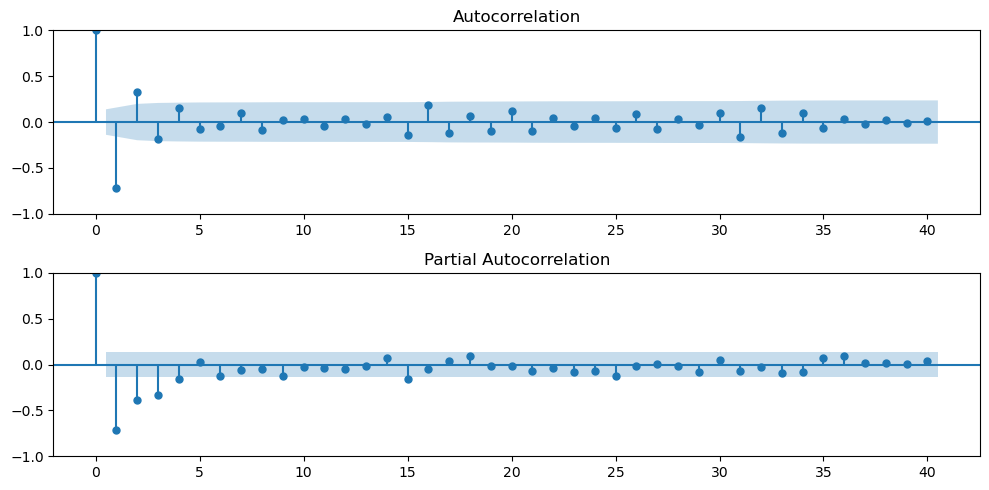

In [56]:
plot_acf_pacf(diff_5)

# ts_6

<Axes: xlabel='Date'>

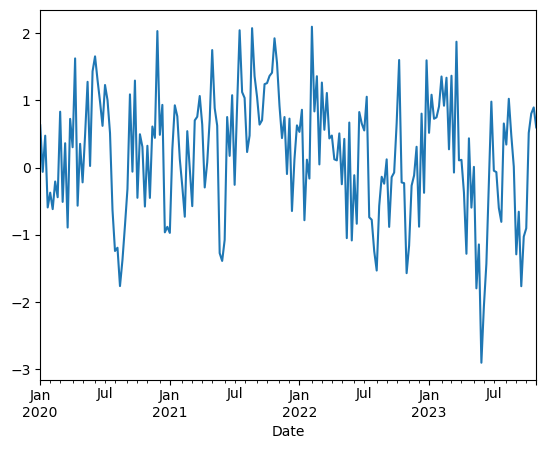

In [57]:
ts_6.plot()

In [58]:
get_adfuller_results(ts_6)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.971288,9,190,0.001569,0.05,True


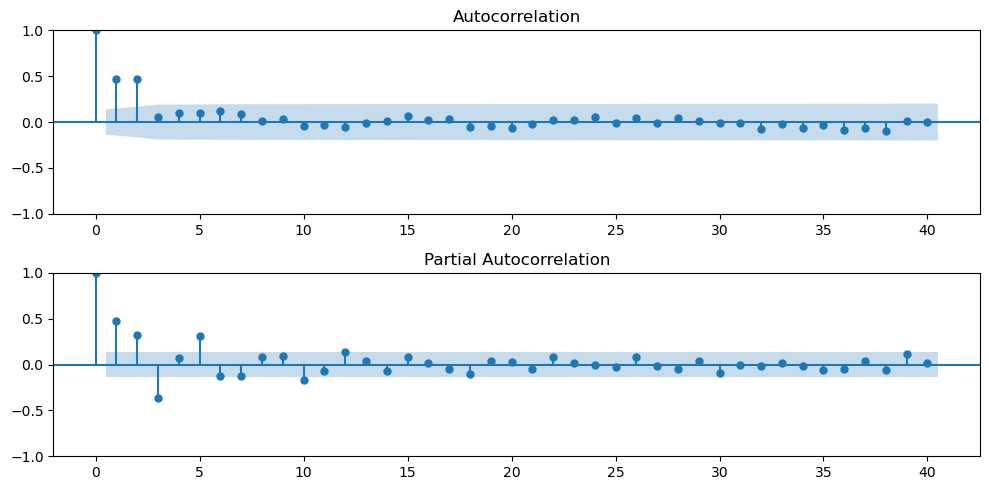

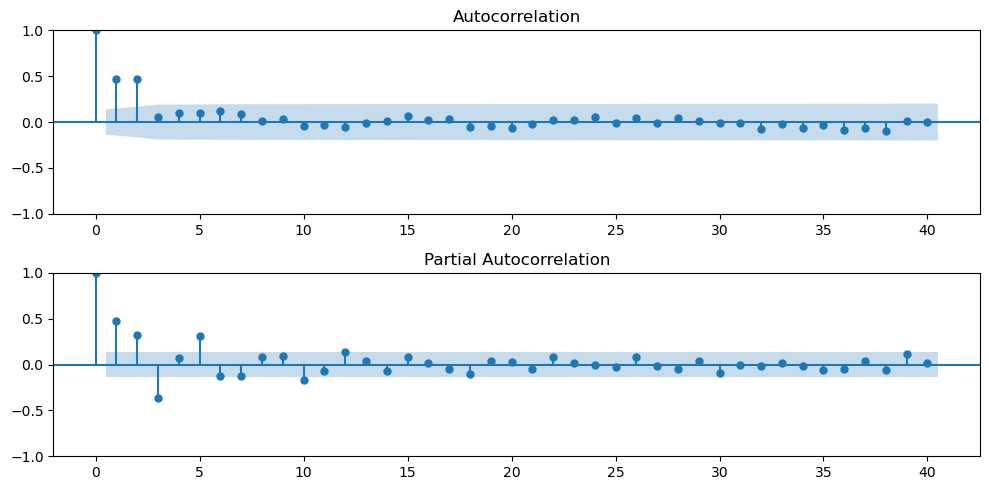

In [59]:
plot_acf_pacf(ts_6)

# ARIMA Models

### Split the data into train and test so that the test is 10 weeks (test_size = 10)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
ts_5.head(5)

Date
2020-01-05    0.335330
2020-01-12    0.253175
2020-01-19    0.202251
2020-01-26    0.137298
2020-02-02    0.305798
Freq: W-SUN, Name: ts_5, dtype: float64

In [62]:
train, test = train_test_split(ts_5, test_size=5*26)

### Visualize the train test split

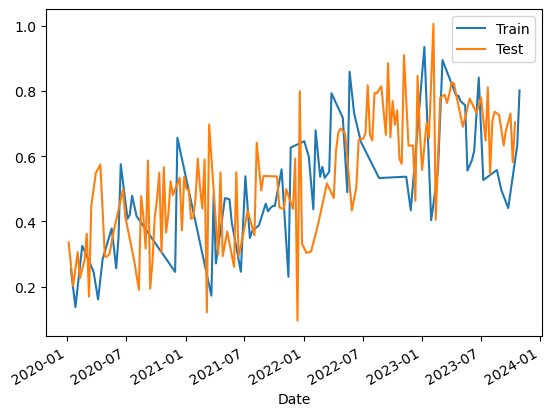

In [63]:
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

Fit an ARIMA model, using the model orders (p,d,q) you determined based on your EDA. (1,1,1)

In [64]:
p=1
d=1
q=1
arima_model = tsa.ARIMA(train, order=(p,d,q)).fit()

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

Check the model summary and diagnostic plots for warning signs

In [65]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ts_5   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  15.945
Date:                Wed, 12 Jun 2024   AIC                            -25.889
Time:                        21:40:49   BIC                            -19.187
Sample:                             0   HQIC                           -23.230
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0416      0.170      0.244      0.807      -0.293       0.376
ma.L1         -0.9979      1.959     -0.509      0.611      -4.838       2.842
sigma2         0.0348      0.069      0.507      0.612      -0.100       0.169
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.84   Prob(JB):                         0.61
Heteroskedasticity (H):               0.94   Skew:                             0.17
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

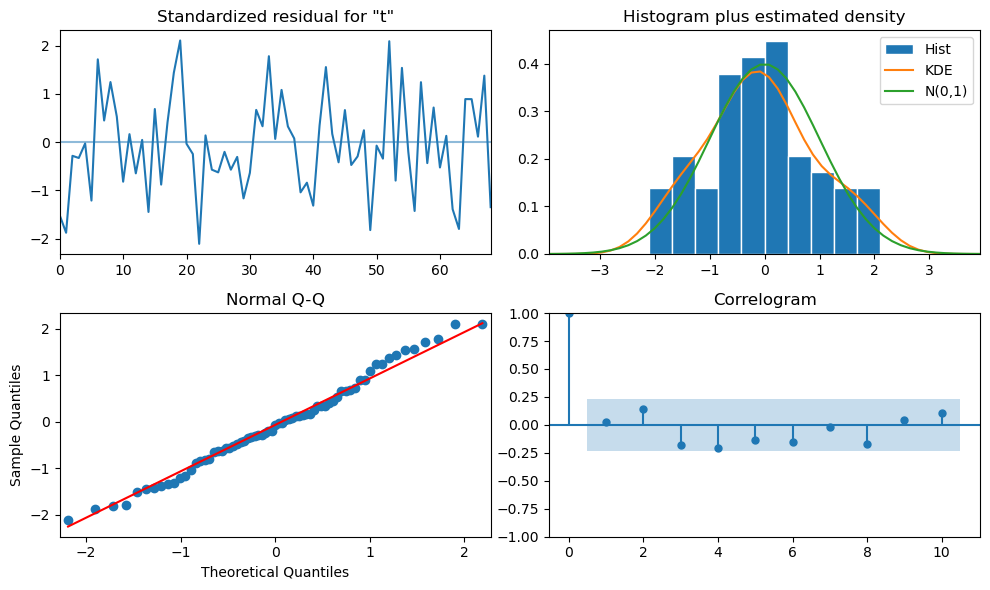

In [66]:
fig = arima_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

Extract a forecast from the model

Visualize the true versus forecasted values

In [68]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 0.160
- MSE = 0.036
- RMSE = 0.191
- R^2 = -0.022
- MAPE = 39.14%


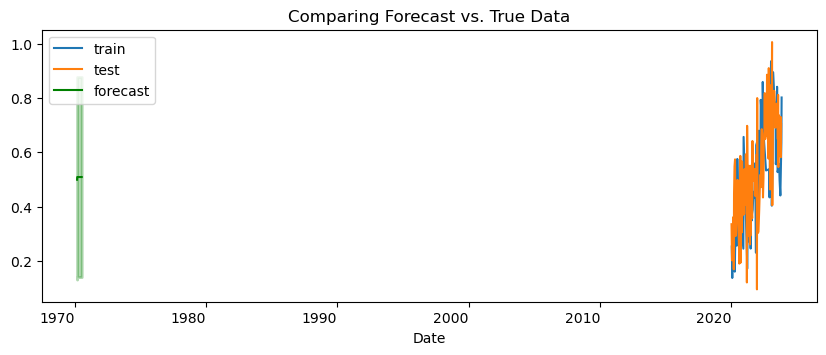

In [71]:
forecast_df = arima_model.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df)
regression_metrics_ts(test, forecast_df['mean'])

Use a loop to try various orders (try 0-2 for p and 0-2 for q)

In [72]:
import itertools
p_values = range(0, 2)  
d_values = [2]          
q_values = range(0, 2)  
pdq_to_try = list(itertools.product(p_values, d_values, q_values))                                            
pdq_to_try

[(0, 2, 0), (0, 2, 1), (1, 2, 0), (1, 2, 1)]

In [73]:
best_aic = float("inf")  
best_pdq = (0,0,0)
for pdq in pdq_to_try:
    model = tsa.ARIMA(train, order=pdq)                      
    result = model.fit()
    print(pdq, result.aic)      
    if result.aic < best_aic:
        
        best_aic = result.aic
        best_pdq = pdq
print("Best AIC:", best_aic)
print("Best pdq:", best_pdq)

(0, 2, 0) 82.882691034802
(0, 2, 1) 16.447301446906067
(1, 2, 0) 32.366197199409044
(1, 2, 1) -2.0196967499027245
Best AIC: -2.0196967499027245
Best pdq: (1, 2, 1)


C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

State the model you select as your final model.

In [75]:
p=1
d=2
q=1
best_model = tsa.ARIMA(train, order=(p,d,q)).fit()

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

In [76]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ts_5   No. Observations:                   70
Model:                 ARIMA(1, 2, 1)   Log Likelihood                   4.010
Date:                Wed, 12 Jun 2024   AIC                             -2.020
Time:                        22:04:57   BIC                              4.639
Sample:                             0   HQIC                             0.619
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5308      0.124     -4.287      0.000      -0.773      -0.288
ma.L1         -0.9976      1.706     -0.585      0.559      -4.340       2.345
sigma2         0.0482      0.082      0.590      0.555      -0.112       0.208
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.84   Prob(JB):                         0.52
Heteroskedasticity (H):               1.03   Skew:                             0.14
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""